# Machine Learning Tools

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Regression

### Linear Regression

In [25]:
data = pd.read_csv("property_cape_town(green_point)_linear_regression_example_dataset.csv")
data.head()

,Unnamed: 0,ID,Link,Title,Location,Excerpt,Address,Size (Meters Squared),Price (ZAR),Bedrooms,Bathrooms,Parking Spaces,Estate Agency,Price per Size (ZAR/Meter Squared)
0,47,111441609,https://www.property24.com/for-sale/green-poin...,Apartment,Green Point,Spacious apartment offering it all!Opportunity...,221 Main Road,141.0,5200000,3.0,3.0,2.0,Seeff Sea Point - Sales,36879.432624
1,80,111425198,https://www.property24.com/for-sale/green-poin...,Apartment,Green Point,Exclusive Joint MandateBrand new unfurnished s...,NaN,74.0,3665000,1.0,1.0,1.0,Rawson Properties Atlantic,49527.027027
2,105,111405474,https://www.property24.com/for-sale/green-poin...,Apartment,Green Point,A unique offering: central studio apartment wi...,8 York Road,44.0,1495000,NaN,1.0,1.0,Vintroux International Real Estate Specialists,33977.272727
3,245,111409268,https://www.property24.com/for-sale/green-poin...,Apartment,Green Point,Exclusive MarketingA truly unmissable opportun...,5 Wessels Road,82.0,2499000,2.0,1.5,1.0,Quay 1 International Realty,30475.609756
4,338,111316658,https://www.property24.com/for-sale/green-poin...,Apartment,Green Point,"2 Bedroomed, 2 bathroomed apartment. Open plan...",169 Main Road,87.0,5485000,2.0,2.0,2.0,Pam Golding Properties - Atlantic Seaboard,63045.977011


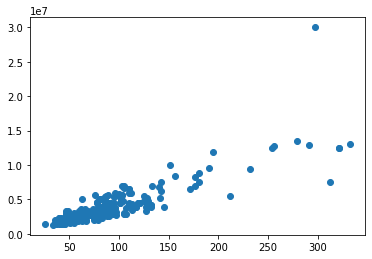

,Size (Meters Squared),Price (ZAR)
Size (Meters Squared),1.000000,0.837736
Price (ZAR),0.837736,1.000000


In [15]:
size_price = data[["Size (Meters Squared)", "Price (ZAR)"]].dropna()
size = size_price["Size (Meters Squared)"]
price = size_price["Price (ZAR)"]

plt.scatter(size, price)
plt.show()

size_price.corr()


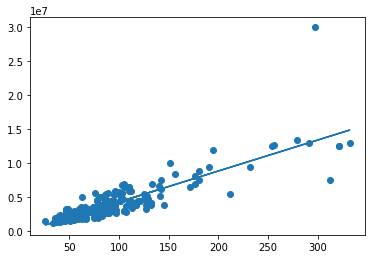

Slope: 45546.04205905685
y-Intercept:  -217993.4732026672
R-Squared Value:  0.8377357013508708


In [27]:
slope, intercept, r, p, std_err = stats.linregress(size, price) #size is x_axis and price is y_axis #function from scipy.stats.linregress

def linear_regression(size): #input x_axis
    return slope * size + intercept #finds y_value

linear_model = list(map(linear_regression, size))

plt.scatter(size, price)
plt.plot(size, linear_model)
plt.show()

print("Slope:", slope)
print("y-Intercept: ", intercept)
print("R-Squared Value: ", r)

"""
Note: distance form the line to a data point is the "error" between the line and the y-value. also known as Residual (u)
"""

## Cluster Analysis 

### KMeans

#import necessary library
from sklearn.cluster import KMeans

#create/load dataset
data = np.array([(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (6, 22), (10, 21), (12, 21)]) #mock data

#Kmeans cluster analysis
number_of_clusters = 3 #assign number of clusters
kmeans = KMeans(n_clusters=number_of_clusters).fit(data)
center_of_clusters = kmeans.cluster_centers_
label_of_each_point = kmeans.labels_

print(label_of_each_point)

data = pd.DataFrame(data, columns=["X-Label", "Y-Label"]) #convert to data frame if not in one already
data["Cluster Labels"] = label_of_each_point #add cluster labels to dataframe

print(data)

#plot graph
fig, ax = plt.subplots()
ax.set(xlabel="X-Label", ylabel="Y-Label")
x_axis = data["X-Label"]
y_axis = data["Y-Label"]

plt.scatter(x_axis, y_axis, c=data["Cluster Labels"], cmap="viridis")

### Determine Number of Clusters (Elbow Curve)

x_axis = data[["X-Label"]] #definitely need the [[]]
y_axis = data[["Y-Label"]]

k_clusters = range(1,10) #choose a range of clusters
kmeans = [KMeans(n_clusters=i) for i in k_clusters]
score = [kmeans[i].fit(y_axis).score(y_axis) for i in range(len(kmeans))]

fig, ax = plt.subplots()
ax.set(xlabel="Number of Clusters", ylabel="Score", title="Elbow Curve")
ax.plot(k_clusters, score)